## Importing libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## loading the dataset

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null value found.

## Checking the target variable category percentage.

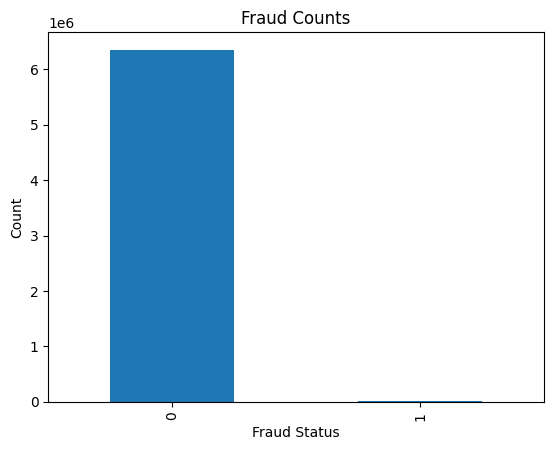

In [8]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['isFraud'].value_counts().plot.bar()
plt.title('Fraud Counts')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()


In [9]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [10]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

### Here 8213 transactions are fraud, and only 16 transections is flagged as fraud by the automated system.

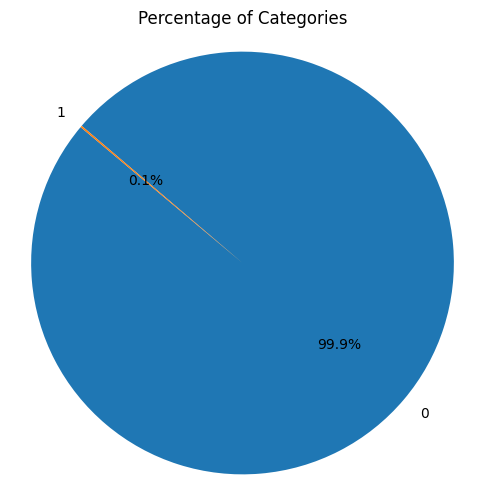

In [11]:
category_counts = df['isFraud'].value_counts()

# Calculate the percentage for each category
category_percentages = (category_counts / category_counts.sum()) * 100

# Create a pie chart to visualize the percentages
plt.figure(figsize=(6, 6))
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Show the pie chart
plt.show()

### This is an imbalance dataset. Where only 0.1% of transection is fraud transection.

In [12]:
df['step'].value_counts()

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64

In [13]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

# Working with only Fraud trasaction data

In [14]:
fraud_df = df[df['isFraud'] == 1]

In [15]:
fraud_df['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

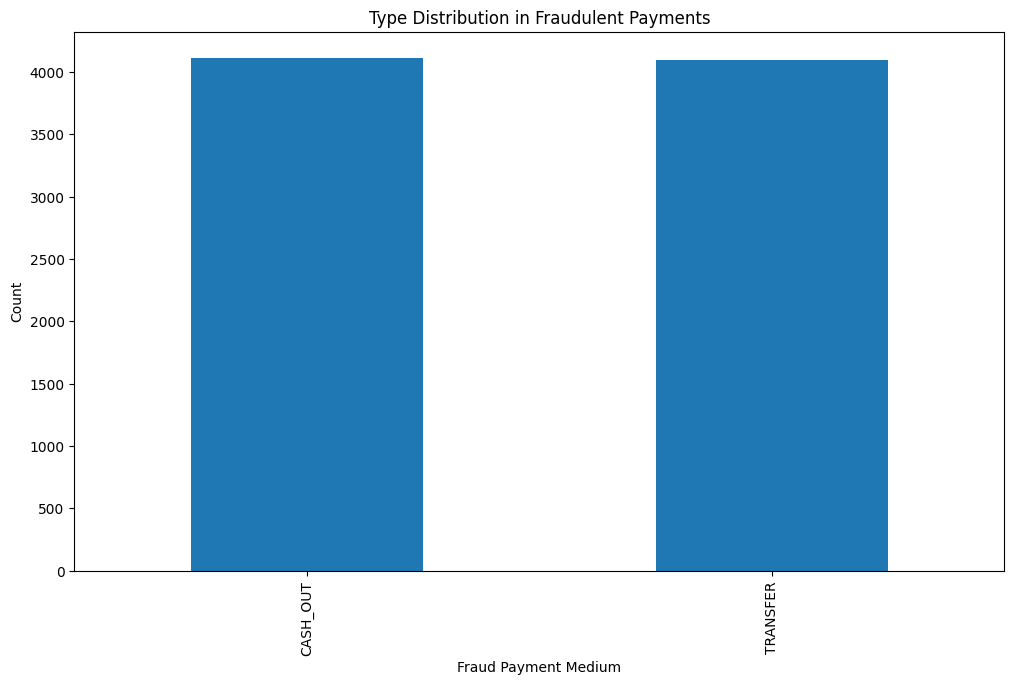

In [16]:
import matplotlib.pyplot as plt

# Assuming fraud_df is your DataFrame containing fraud data
fraud_df['type'].value_counts().plot.bar(figsize=(12,7))
plt.title('Type Distribution in Fraudulent Payments')
plt.xlabel('Fraud Payment Medium')
plt.ylabel('Count')
plt.show()


### From this plot, we can see that there are only two mediums used for fraud transection “Cashout” & “Transfer”.

In [17]:
fraud_df['newbalanceOrig'].value_counts()

newbalanceOrig
0.00           8053
17316255.05       3
10399045.08       3
19585040.37       3
4953893.08        2
               ... 
34892193.09       1
1975271.77        1
11975271.77       1
1653144.10        1
29585040.37       1
Name: count, Length: 145, dtype: int64

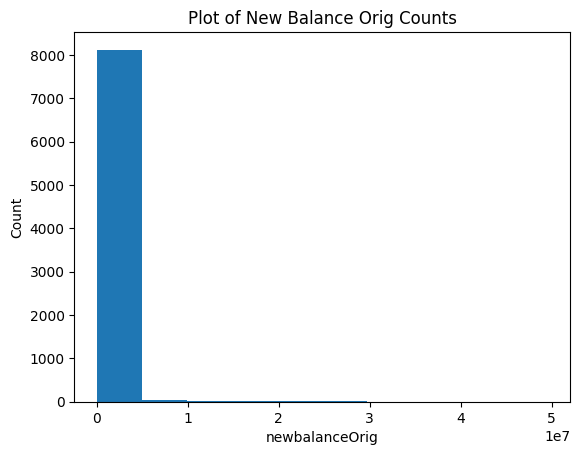

In [18]:
plt.hist(fraud_df['newbalanceOrig'])
plt.title('Plot of New Balance Orig Counts')
plt.xlabel('newbalanceOrig')
plt.ylabel('Count')
plt.show()

### This plot shows that most of the time when fraud transactions occur the new balance is zero.

In [19]:
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [20]:
fraud_df['oldbalanceDest'].value_counts()

oldbalanceDest
0.00          5351
386985.85        1
716857.20        1
8682013.45       1
6493.14          1
              ... 
388830.36        1
261802.02        1
346223.18        1
85009.83         1
6510099.11       1
Name: count, Length: 2863, dtype: int64

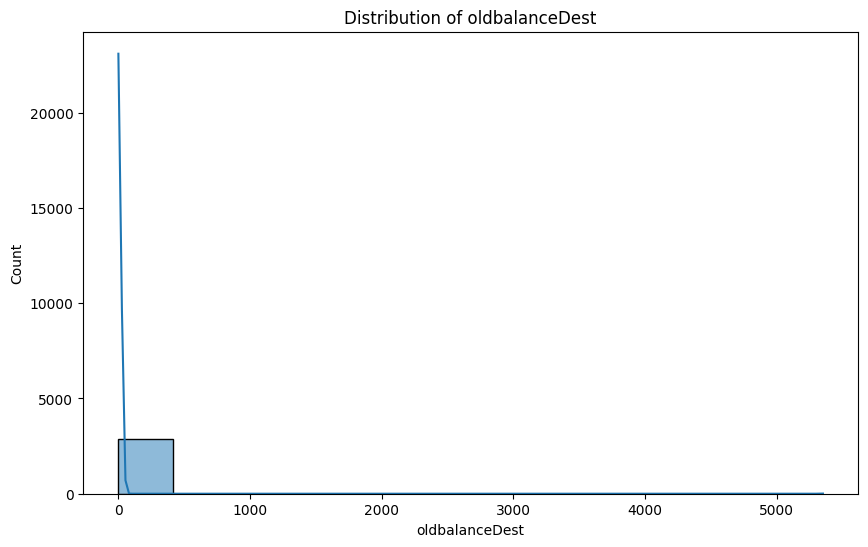

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming fraud_df is your DataFrame
# Replace this with your actual DataFrame if it's different
# Example:
# fraud_df = pd.read_csv('your_dataset.csv')

# Use value_counts() to get the count of unique values in 'oldbalanceDest'
value_counts = fraud_df['oldbalanceDest'].value_counts()

# Create a distribution plot using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(value_counts, kde=True)
plt.title('Distribution of oldbalanceDest')
plt.xlabel('oldbalanceDest')
plt.ylabel('Count')
plt.show()


### This plot shows that most of the time when fraud transactions occur the destination's old balance is zero.

In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [23]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

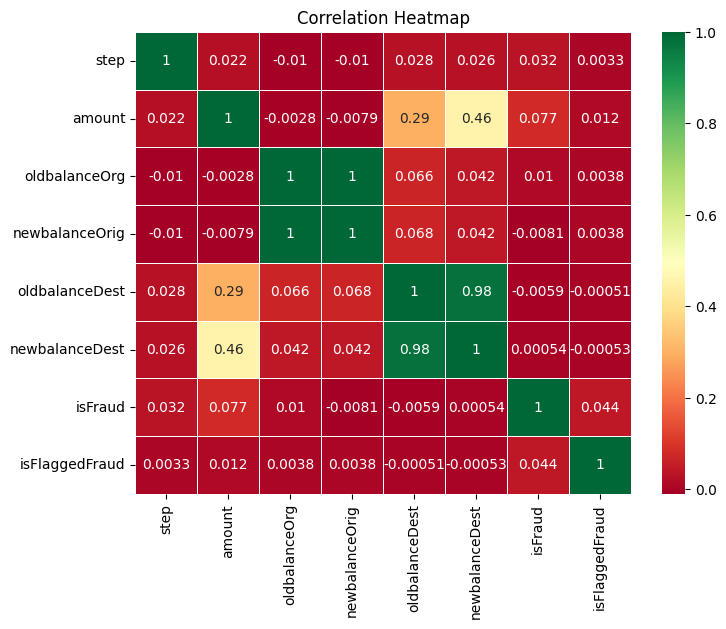

In [24]:
col=['type', 'nameOrig','nameDest']
dfcorr=df.drop(columns=col)
correlation_matrix = dfcorr.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [25]:
# drop unnecessary feature

df=df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

In [26]:
df.shape

(6362620, 8)

In [27]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [28]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [29]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,3,710400,587897,1157557,0,0,0
1,0,3,141767,140919,336044,0,0,0
2,0,4,13666,1672,0,0,0,1
3,0,1,13666,1672,0,82843,0,1
4,0,3,822964,230032,456430,0,0,0


In [30]:
df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,742,1,4593321,847926,0,0,1040878,1
6362616,742,4,5311231,1555414,0,0,0,1
6362617,742,1,5311231,1555414,0,243224,3327127,1
6362618,742,4,5160929,1084856,0,0,0,1
6362619,742,1,5160929,1084856,0,3388830,3372720,1


In [31]:
df['step'].value_counts()

step
18     51352
17     49579
186    49083
234    47491
306    46968
       ...  
431        4
705        4
692        4
111        2
661        2
Name: count, Length: 743, dtype: int64

In [32]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [33]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [34]:
sample_size = 1000000  # Set your desired sample size
df_sample = df.sample(n=sample_size, random_state=42)

In [35]:
df = df_sample

In [36]:
# Dividing dependent and independent variables

X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [37]:
# Sampling

from imblearn.over_sampling import SMOTE
from collections import Counter

sampler = SMOTE()
X_res, y_res = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y_res)))

SMOTE Counter({0: 998734, 1: 998734})


In [38]:
# Splitting a dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_res, y_res, test_size=0.25, random_state=42)

In [39]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('\nClassification Report:\n', classification_rep)

Accuracy: 0.9422789251192009

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94    249836
           1       0.96      0.92      0.94    249531

    accuracy                           0.94    499367
   macro avg       0.94      0.94      0.94    499367
weighted avg       0.94      0.94      0.94    499367



In [41]:
import pickle
pickle.dump(logreg_model, open('pickle.pkl','wb'))

In [44]:
# Loading model to compare the results

model = pickle.load(open('pickle.pkl','rb'))
print(logreg_model.predict([[0,3,710400,587897,1157557,0,0]]))

[0]
